## Obstruction Analysis Final Notebook
Team members: Valerie Gorden, Henry Starr, Adam Moumena

# Introduction

GLOBE Clouds is a NASA program that aims to use civilian-taken images of clouds to train a model that can correctly identify cloud types. In order to have a data set that is valid, reliable, and relevant to the overall goal of GLOBE Clouds, it is important that the images taken by civilians are clear and accurately labeled. The cleaner the data set is, the more accurately the NASA model will be able to classify clouds and find possible locations to put solar fields (Robles et al, 2020).



The main objective of our team's project is to try to create a model that can accurately and precisely distinguish obstructed images from pure clear and cloud images. Sky images that are too obstructed by buildings, trees, etc. are unwanted in the final GLOBE Clouds data set, as they are not able to be classified due to the large obstructions in them. That being said, images with smaller obstructions are not necessarily unusable. In our deliverable, we aim to separate images based on how large the obstruction is within the image (1-25% obstructed, 25-50% obstructed, and >50% obstructed). After manually creating our data set, we will split our data into a training and test set and train a model using Google Teachable Machine. Once we have a trained model, we will send our test set through and evaluate the model's performance, as well as make any corrections necessary to improve the model's accuracy. In addition, there is research to suggest that grayscaling images makes them easier to classify, so we would like to grayscale our images and train/test a new Teachable Machine to see if we get more accurate results (Bui et al, 2016).

Through this research, our team hopes to contribute to NASA's ultimate goal of creating a model that can accurately identify different cloud types. By doing so, NASA will be able to identify good locations for solar fields using cloud data, as solar energy production is becoming increasingly more relevant in today's means of energy production.

#Dependencies


We need to import some necessary libraries for our code to run properly.

In [ ]:
# Import statements
import pandas as pd  # Pandas; for reading .csv files from drive
import numpy as np  # Numpy; for efficient calculations
import matplotlib.pyplot as plt  # Matplotlib will allow us to make visuals of our data and display images
from google.colab import drive  # We import drive so that we can mount our FIRE-CC drive to the Colab environment
drive.mount('/content/gdrive') # This comand is how we tell google we have permission to access the data on drive
from keras.models import load_model # Used to load in keras models
import os # For creating/moving/getting folders and directories
from PIL import Image, ImageOps # Provides image editing capabilities
import random# Used for generating random numbers
from keras.preprocessing import image # Preprocesses our images
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
import cv2 # Used for image editing and processing
import shutil as sh # Helps you automate copying files and directories
import glob # Gives us filepaths that fit a specifc pattern, in this case it's .jpg since we are using images
from os import listdir, makedirs
from os.path import isfile, join # isfile tells whether a path is a file and join combines pathname components

Mounted at /content/gdrive


## Objective 1: Creating our Test and Training Set

We created four folders to hold and separate all of the images in our dataset. We defined these categories by how obstructed the images in them were. An obstructed image is any image that had buidlings, trees, or people in the image (in other words, they were not a pure image of the sky). These folders include:


*   Un-Obstructed: images with no obstructions (clear sky or cloud image).
*   Minor Obstructed: 1-25% of the image is obstructed.

*   Moderate Obstructed: 25-50% of the image is obstrcuted.
*   Major Obstructed: >50% of the image is obstructed.

We selected images manually from the GLOBE Clouds dataset. In addition to the obstruction criteria, images that were chosen were also made sure contain a variety of different clouds as to not have a biased dataset. Each folder contained 60 images for a total of 240 images.

Here we save the filepaths to our four image folders under a name that we can use later.

In [ ]:
# Paths for each folder (Un-obstructed, Minor Obstructions, Moderate Obstructions, Major Obstructions)

unobstructed_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Original/Un-obstructed (0%)/'
minor_obstr_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Original/Minor Obstructed(1-25%)/'
mod_obstr_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Original/Obstructed(25-50%)/'
major_obstr_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Original/Major Obstructed (>50%)/'

This image resizer function is taken from The Final Four deliverable from last semester. With it, we can resize all of our images to the same shape so that the Teachable Machine doesn't have any trouble reading them. In order to make sure that the obstructions in our images didn't accidentally get cropped out when resized, we went back and double-checked our images to confirm that they had only been resized and not cropped.

In [ ]:
# Taken from TheFinalFour deliverable
def load_image(path): # Path: where the image is stored
    img = Image.open(path)
    newsize = (224, 224) # Images need to be 224x224 for teachable machine
    img = img.resize(newsize)
    x = np.array(img)[:,:,:3]
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

With our image resizer and filepaths, we can resize images and store them in empty lists. We do this for each of our 4 categories. From there, we save our new resized images to a new folder using img.save(). We have commented out this function so that our code will only run the resizer once.

In [ ]:
# Coded by Henry, Valerie, and Adam

# We need to get a list of file paths for all of our images
# We chose 60 images of each category; this function loads all the images.
dirs_unobstr = os.listdir(unobstructed_path)
paths_of_unobstr = [] # Make an empty list to store paths in

for filename in dirs_unobstr:
   img, x = load_image(unobstructed_path+filename)
   paths_of_unobstr.append(filename)
   #img.save("/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Resized/Un Obstructed Resized/" + filename)

In [ ]:
# Same logic for minor obstructed images

dirs_minobstr = os.listdir(minor_obstr_path)
paths_of_minobstr = []
for filename in dirs_minobstr:
   img, x = load_image(minor_obstr_path+filename)
   paths_of_minobstr.append(filename)
   #img.save("/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Resized/Minor Obstructed Resized/" + filename)

In [ ]:
# Same logic for moderate obstructed images

dirs_modobstr = os.listdir(mod_obstr_path)
paths_of_modobstr = []
for filename in dirs_modobstr:
   img, x = load_image(mod_obstr_path+filename)
   paths_of_modobstr.append(filename)
   #img.save("/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Resized/Obstructed Resized/" + filename)

In [ ]:
# Same logic for major obstructed images

dirs_majorobstr = os.listdir(major_obstr_path)
paths_of_majobstr = []
for filename in dirs_majorobstr:
  img, x = load_image(major_obstr_path+filename)
  paths_of_majobstr.append(filename)
  #img.save("/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Resized/Major Obstructed Resized/" + filename)


We define new filepaths that lead to the folders with our resized images.

In [ ]:
# New resized image filepaths

resize_unobstructed_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Resized/Un Obstructed Resized/'
resize_minor_obstr_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Resized/Minor Obstructed Resized/'
resize_mod_obstr_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Resized/Obstructed Resized/'
resize_major_obstr_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Resized/Major Obstructed Resized/'

The following is our training/test split code that was inspired by the code from the Polar Lowe's Final Deliverable. Rather than split them 80/20 directly, we had the code randomly take out 12 images (20%) from each folder and store them in a new test folder made for each category. To make sure that our code doesn't run again and take out another random 12 images from our folders, we have commented out the separate_images() function at the bottom of the code that splits our data.

In [ ]:
# Code edited by Valerie, Henry, and Adam

# Function made to seperate images that were put in the training folders, into testing folders (20%)
def seperate_images(origin, dest, amt):
  path = os.listdir(origin)
  ##print(list)

 # Index set to 0, used throughout function
  i = 0
  j = 0 # Added to help us generate randomized images
  randin = random.randint(3, 5) # Randomizes an image for every 3-5 images
  print(amt * .2)
  print(randin)

# For loops used to iterate through images in the list from parameter
  for img in path:
    # ONLY moves the images if the incrementing index has not reached 20% yet. This ensures ONLY 20% of the data is being moved
    if(i != int(amt * .2)):
      if (j % randin == 0):
        # Copies image to destination
         sh.copy(origin + "/" + img, dest)
         print(dest)
        # Deletes image from where its at
         os.remove(origin + "/" + img)
        # Increments code
         i = i + 1
      j = j + 1

# Separating 20% of the images in each folder into a new premade folder
# Code below commented out because it's only supposed to be ran once

# seperate_images(paths_of_unobstr, resize_unobstructed_path, "/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Test/UnobTest/",len(paths_of_unobstr))
# seperate_images(paths_of_minobstr, resize_minor_obstr_path, "/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Test/MinTest/", 60)
# seperate_images(paths_of_majobstr, resize_major_obstr_path, "/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Test/MajTest/", 60)
# seperate_images(paths_of_modobstr, resize_mod_obstr_path, "/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Test/ObTest/", 60)


## Objective 2: Training and Testing our Teachable Machine

[GOOGLE Teachable Machine](https://teachablemachine.withgoogle.com/) is a web-based supervised machine learning tool that uses a provided set of visual or audial data to train a model. In order to train our model, our four training sets of data were downloaded into our files and then uploaded into the model. Each category was given its own label that corresponded to the type of images in it. After training, the model was saved and uploaded into Google Drive where it could be loaded into our code.

Here, we import the model from and its labels from our Google Drive using keras so we can send our test set through the model.

In [ ]:
# Coded by Valerie and Adam

np.set_printoptions(formatter={'float_kind':'{:f}'.format})
# Loading in our model with keras (set compile to false so the warning "No training configuration found in save file" fixes)
model = load_model('/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Model/keras_model.h5', compile=False)
# Loading in the labels for our categories
labels = [line for line in open("/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Model/labels.txt")]

In order to run images through the teachable machine, we first wanted to be sure that each image was sized correctly. Teachable machine reads images as 3D arrays, so we changed the shape of our images so that teachable machine doesn't give us an error when trying to read the photos. This is done for each of our four categories.

In [ ]:
# Coded by Valerie

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.

# Array, resize of images, and list for Unobstructed Images to be fed.
testUnob = "/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Test/UnobTest"
listTestUnob = os.listdir(testUnob)

# Array, resize of images, and list for Minor Obstructed Images to be fed.
testMinob = "/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Test/MinTest"
listTestMinob = os.listdir(testMinob)

# Array, resize of images, and list for Moderate Obstructed Images to be fed.
testModob = "/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Test/ObTest"
listTestModob = os.listdir(testModob)

# Array, resize of images, and list for Major Obstructed Images to be fed.
testMajob = "/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Test/MajTest"
listTestMajob = os.listdir(testMajob)

Because we have multiple images in each folder, we need to create a loop that will cycle through the images in each folder and run them through the model. To do this, we save our images as numpy arrays and normalize them. Once we have our image array, we can use model.predict() to have the model analyze our images and make a prediction. This prediction is then saved into an empty list that specifies whether the prediction matched the truth label.

In [ ]:
# Coded by Valerie, Adam, and Henry

# Empty lists made ahead of time so we can save model predictions
# There are 4 lists for misclassified images and 4 lists for correctly classified images

# Arrays created to use later in our code in order to display images for visual purposes based on perdiction made
mis_majob = []
mis_minob = []
mis_unob = []
mis_modob = []

cor_majob = []
cor_minob = []
cor_unob = []
cor_modob = []

# Save the size of the image
size = (224, 224)
data = np.ndarray(shape=(4*len(listTestModob), 224, 224, 3), dtype=np.float32)
y_true = np.ndarray(4*len(listTestModob))

#Running Unobstructed images through loop and using the Teachable Machine to predict what they are
i = 0
for inx , pic in enumerate(listTestUnob) : # Cycles through images in our Unobstructed category
  img = testUnob+ "/" + pic
  image = Image.open(img)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image) # Convertes an image to an array
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1 # Normalizes an image array

  # Truth Label for Un Obstructed Images is 0
  y_true[i] = 0
  data[i] = normalized_image_array

  curr_pred = model.predict(data) # The model looks at the image array and makes a prediction
  if(np.argmax(curr_pred,axis=1)[i] == y_true[i]): # If the model prediction mathces the truth label, store it in the correct list
    cor_unob.append(pic)
  else: # If the prediction doesn't match the truth label, store it in the misclassified list
    mis_unob.append(pic)
  i = i + 1

# Similar logic for the other categories
# Running Minor Obstructed images through loop and using the Teachable Machine to predict what they are
for inx , pic in enumerate(listTestMinob) :
  img = testMinob+ "/" + pic
  image = Image.open(img)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

  # Truth Label for Minor Obstructed Images is 1
  y_true[i] = 1
  data[i] = normalized_image_array

  curr_pred = model.predict(data)
  if(np.argmax(curr_pred,axis=1)[i] == y_true[i]):
    cor_minob.append(pic)
  else: # If the prediction doesn't match the truth label, store it in the misclassified list
    mis_minob.append(pic)
  i = i + 1

#Running Moderate Obstructed images through loop and using the Teachable Machine to predict what they are
for inx , pic in enumerate(listTestModob) :
  img = testModob+ "/" + pic
  image = Image.open(img)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

  # Truth Label for Moderate Obstructed Images is 2
  y_true[i] = 2
  data[i] = normalized_image_array

  curr_pred = model.predict(data)
  if(np.argmax(curr_pred,axis=1)[i] == y_true[i]):
    cor_modob.append(pic)
  else: # If the prediction doesn't match the truth label, store it in the misclassified list
    mis_modob.append(pic)
  i = i + 1

#Running Major Obstructed images through loop and using the Teachable Machine to predict what they are
for inx , pic in enumerate(listTestMajob) :
  img = testMajob+ "/" + pic
  image = Image.open(img)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

  # Truth Label for Major Obstructed Images is 3
  y_true[i] = 3
  data[i] = normalized_image_array

  curr_pred = model.predict(data)
  if(np.argmax(curr_pred,axis=1)[i] == y_true[i]):
    cor_majob.append(pic)
  else: # If the prediction doesn't match the truth label, store it in the misclassified list
    mis_majob.append(pic)
  i = i + 1

# Running the data we collected into the model.
prediction = model.predict(data)

# Predictions made by the model. Will be used to create confusion matricies
y_pred = np.argmax(prediction, axis=1)

print(y_pred)
print(y_true)

We are going to anaylze our model using a confusion matrix. This will help us determine the overall accuracy of our model as well as how precise it was in classifying each image category. To do this, we've imported the confusion matrix library.

The accuracy score of the model is 0.8333333333333334
The precision score for predicting Unobstructed cloud images is 0.75
The precision score for predicting Minor Obstructed cloud images is 0.875
The precision score for predicting Moderate Obstructed cloud images is 0.8333333333333334
The precision score for predicting Major Obstructed cloud images is 0.9166666666666666


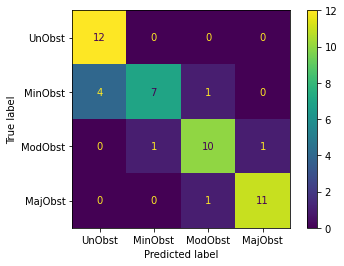

In [ ]:
# Coded by Adam

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score

# Confusion Matrix
# Comparing the truth labels to the predictions made by the model
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3])

# Accuracy Score
accuracy = accuracy_score(y_true, y_pred)
print("The accuracy score of the model is " + str(accuracy))

# Precision Score
precision = precision_score(y_true, y_pred, average=None)
print("The precision score for predicting Unobstructed cloud images is " + str(precision[0]))
print("The precision score for predicting Minor Obstructed cloud images is " + str(precision[1]))
print("The precision score for predicting Moderate Obstructed cloud images is " + str(precision[2]))
print("The precision score for predicting Major Obstructed cloud images is " + str(precision[3]))

# Displaying the Confusion Matrix
# Used defined labels from labels.txt in the converted_keras folder in the drive
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['UnObst', 'MinObst', 'ModObst', 'MajObst'])
disp.plot()
plt.show()

## Confusion Matrix Analysis

**How to Read Our Confusion Matrix:** the vertical axis represents the actual classification of an image in each category. The horizontal axis represents the model’s prediction of an image. Ideally, the predicted value for an image should match its truth value and form a diagonal line of results.

Our model was about 83% accurate in classifying obstructions. It was most precise in identifying major obstructed and minor obstructed images, with precision scores 91.6% and 87.5% respectively. The precision scores for moderate obstructed and unobstructed images were lower at 83.3% and 75% respectively.

The model appeared to classify many of the minor obstructed images as unobstructed. This could be a result of images that have very low coverage being confused as unobstructed images. For example, an image with 2% obstruction may be confused with an image that is unobstructed, thus leading to the discrepancy in our confusion matrix. Overall the model performed quite well, but there is always room for an improved design.

(written by Henry)



## Visualising the Classifications

Our confusion matrix did a good job of letting us know how well our model did, but now we want to look at the actual images themselves to see which ones were misclassified. Doing so will help us understand why an image might have been misclassified.

<ipython-input-16-072c0dd6c272>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(rows, columns, i+1) # Arranges the images into rows and columns


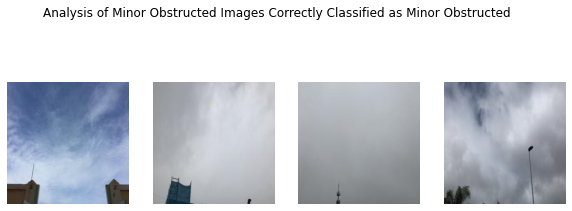

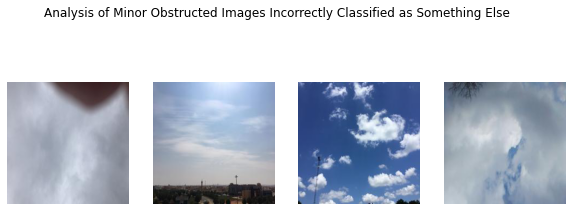

In [ ]:
# Coded by Valerie

fig = plt.figure(figsize=(10, 7))

# Setting values to rows and column variables
rows = 2
columns = 4

# Reading in images for correctly classified Minor Obstructed images
image_array = []
for image in cor_minob[0:4]: #There are only 5 misclassified images, so we'll look at 4 correct and incorrect images
  image_array.append(Image.open('/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Test/MinTest/' + image))

fig.suptitle("Analysis of Minor Obstructed Images Correctly Classified as Minor Obstructed") # Adds a title
for i, image in enumerate(image_array): # Goes through image_array and takes eight samples
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(image) # Display the image
  plt.axis('off')

fig.show() # Displays the graph after adding its images

# Reading in images for incorrectly classifiedMinor Obstructed images
image_array = []
for image in mis_minob[0:4]: # There are only 5 misclassified images, so we'll look at 4 correct and incorrect images
  image_array.append(Image.open('/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Test/MinTest/' + image)) # Looking for a file path, not just an image name

# Adds a subplot at the 1st position
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(rows, columns, 1)

fig.suptitle("Analysis of Minor Obstructed Images Incorrectly Classified as Something Else") # Adds a larger, centered title on the plot
for i, image in enumerate(image_array): # Loops through 4 images
  fig.add_subplot(rows, columns, i+1) # Arranges the images into rows and columns
  plt.imshow(image)
  plt.axis('off')

fig.show()


## Analysis of Images

The figure above is a visualization of both correctly and incorrectly classified images from the Minor Obstruction category, which was our least accurate category. In some of the images that were incorrectly classified, it can be observed that the obstructions within the first and second images from the right were very small, which could have possibly led them to be confused with unobstructed images. The first and second images to the left have slightly larger obstructions in them, which could explain why either one of them were possibly confused with images in the Moderate Obstruction category.

## Objective 3: Damage Control

Given our results above, we decided that no large changes needed to be made to our model. The Teachable Machine's accuracy score was acceptable, so we decided to leave the model as it is so we could focus on the rest of our project.

##Objective 4: Grayscale Our Images

We define a new function called convert_image() to help convert our images from RGB to grayscale. The following work was inspired by example code that can be found [here](https://stackoverflow.com/questions/47087528/converting-images-in-a-folder-to-grayscale-using-python-and-opencv-and-writing-i).

In [ ]:
# Coded by Henry & Valerie

def convert_image(source_path, dest_path):
  try: # Try tests code for errors
    makedirs(dest_path) # Makes sure that our destination path is a directory
  except: # Except lets you handle any errors found by try
    print ("Directory already exist, images will be written in same folder") # If the source path is already a directory, print this

  files = list(filter(lambda f: isfile(join(source_path,f)), listdir(source_path)))
  for image in files:
    try:
        img = cv2.imread(os.path.join(source_path,image)) # Loads an image
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        joined_dest_path = join(dest_path,image)
        print(gray)
        cv2.imwrite(joined_dest_path,gray)
    except:
        print ("{} is not converted".format(image)) # If there is an error in the code above, print this
  for fil in glob.glob("*.jpg"): # Searches for filenames that contain .jpg
    try:
        image = cv2.imread(fil)
        gray_image = cv2.cvtColor(os.path.join(source_path,image), cv2.COLOR_BGR2GRAY) # Convert to greyscale
        cv2.imwrite(os.path.join(dest_path,fil),gray_image) # Copies over our grayscale image to destination path
    except:
        print('{} is not converted') # If there's an error, print this


The following code specifies a source and destination path for the grayscale images. The convert_image() function is then called on the source (resized images) and the destination (respective grayscale image folder). This code has been commented out so that the grayscale function is only called once.

In [ ]:
#Coded by Henry
#Do not run
'''
source_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/All Resized/Mod/' # Our image source for moderate obstructed
dest_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Grayscale/Gray Modob/' # Our image destination for gray moderate obstructed
convert_image(source_path, dest_path)

source_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/All Resized/Min/' # Our image source for minimum obstructed
dest_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Grayscale/Gray Minob/' # Our image destination for gray minimum obstructed
convert_image(source_path, dest_path)

source_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/All Resized/Maj/' # Our image source for major obstructed
dest_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Grayscale/Gray Majob/' # Our image destination gray major obstructed
convert_image(source_path, dest_path)

source_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/All Resized/Un/' # Our image source for unobstructed
dest_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Grayscale/Gray Unob/' # Our image destination for gray unobstructed
convert_image(source_path, dest_path)

'''

Here we call on the separate_images() function made earlier so that we can split our grayscaled images into a test and training set. The function has been commented out so that the split only happens once.

In [ ]:
# Coded by Adam

# Train paths for each type of obstruction
gray_unobstructed_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Grayscale/Gray Unob/'
gray_minor_obstr_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Grayscale/Gray Minob/'
gray_mod_obstr_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Grayscale/Gray Modob/'
gray_major_obstr_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Grayscale/Gray Majob/'

# Test paths for each type of obstruction
gray_unobstructed_test_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Grayscale/Test/Gray UnobTest'
gray_minor_obstr_test_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Grayscale/Test/Gray MinobTest'
gray_mod_obstr_test_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Grayscale/Test/Gray ModobTest'
gray_major_obstr_test_path = '/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Images/Grayscale/Test/Gray MajobTest'

# Calling the separate images function made earlier to split the data set into training and test
#seperate_images(gray_unobstructed_path, gray_unobstructed_test_path, 60)
#seperate_images(gray_minor_obstr_path, gray_minor_obstr_test_path, 60)
#seperate_images(gray_major_obstr_path, gray_major_obstr_test_path, 60)
#seperate_images(gray_mod_obstr_path, gray_mod_obstr_test_path, 60)



The training set was used to train a Teachable Machine for grayscale images. That model has been uploaded here.

In [ ]:
# Coded by Valerie

np.set_printoptions(formatter={'float_kind':'{:f}'.format})
# Loading in our model with keras (set compile to false so the warning "No training configuration found in save file" fixes)
model = load_model('/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Model/Grayscale Model/keras_model.h5', compile=False)
# Loading in the labels for our categories
labels = [line for line in open("/content/gdrive/Shareddrives/FIRE-CC/FIRE298/2022/The Four Horsemen/Model/Grayscale Model/labels.txt")]

Once the model is loaded, the predictions are ready to be made. First, we save our filepaths as a list of all the images in each folder.


In [ ]:
# Coded by Valerie

# Save each folder as a list of images to resize later.
listTestGrayUnob = os.listdir(gray_unobstructed_test_path)
listTestGrayMinob = os.listdir(gray_minor_obstr_test_path)
listTestGrayModob = os.listdir(gray_mod_obstr_test_path)
listTestGrayMajob = os.listdir(gray_major_obstr_test_path)

The following code block iterates through the testing set for each category and sends it through the teachable machine. The prediction based off the output using the teachable machine is then stored.

In [ ]:
# Coded by Valerie, Adam, and Henry

# Save the size of the image
size = (224, 224)
gdata = np.ndarray(shape=(4*len(listTestGrayUnob), 224, 224, 3), dtype=np.float32)
y_true = np.ndarray(4*len(listTestGrayUnob))

#Running Unobstructed images through loop and using the Teachable Machine to predict what they are
i = 0
for inx , pic in enumerate(listTestGrayUnob) : # Cycles through images in our Unobstructed category
  img = gray_unobstructed_test_path+ "/" + pic
  image = Image.open(img)

  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image) # Convertes an image to an array
  img1 = np.repeat(image_array[:, :, np.newaxis], 3, axis=2)
  normalized_image_array = (img1.astype(np.float32) / 127.0) - 1 # Normalizes an image array
  # Truth Label for Un Obstructed Images is 0
  y_true[i] = 0
  gdata[i] = normalized_image_array
  i = i + 1

# Similar logic for the other categories
# Running Minor Obstructed images through loop and using the Teachable Machine to predict what they are
for inx , pic in enumerate(listTestGrayMinob) :
  img = gray_minor_obstr_test_path+ "/" + pic
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image) # Convertes an image to an array
  img1 = np.repeat(image_array[:, :, np.newaxis], 3, axis=2)
  normalized_image_array = (img1.astype(np.float32) / 127.0) - 1 # Normalizes an image array
  # Truth Label for Minor Obstructed Images is 1
  y_true[i] = 1
  gdata[i] = normalized_image_array
  i = i + 1

#Running Moderate Obstructed images through loop and using the Teachable Machine to predict what they are
for inx , pic in enumerate(listTestGrayModob) :
  img = gray_mod_obstr_test_path+ "/" + pic
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image) # Convertes an image to an array
  img1 = np.repeat(image_array[:, :, np.newaxis], 3, axis=2)
  normalized_image_array = (img1.astype(np.float32) / 127.0) - 1 # Normalizes an image array
  # Truth Label for Moderate Obstructed Images is 2
  gdata[i] = normalized_image_array
  y_true[i] = 2
  i = i + 1

#Running Major Obstructed images through loop and using the Teachable Machine to predict what they are
for inx , pic in enumerate(listTestGrayMajob) :
  img = gray_major_obstr_test_path+ "/" + pic
  image = ImageOps.fit(image, size, Image.ANTIALIAS)
  image_array = np.asarray(image) # Convertes an image to an array
  img1 = np.repeat(image_array[:, :, np.newaxis], 3, axis=2)
  normalized_image_array = (img1.astype(np.float32) / 127.0) - 1 # Normalizes an image array
  # Truth Label for Major Obstructed Images is 3
  y_true[i] = 3
  gdata[i] = normalized_image_array

  i = i + 1

# Running the data we collected into the model
prediction = model.predict(gdata)
# Predictions made by the model
y_pred = np.argmax(prediction, axis=1)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


2/2 [==============================] - 2s 251ms/step


After collecting all the predictions for each category, a confusion matrix is ready to be produced to have a visualization of the results.

[0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000 1.000000 1.000000
 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000
 2.000000 2.000000 2.000000 2.000000 2.000000 2.000000 2.000000 2.000000
 2.000000 2.000000 2.000000 2.000000 3.000000 3.000000 3.000000 3.000000
 3.000000 3.000000 3.000000 3.000000 3.000000 3.000000 3.000000 3.000000]
[0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
The accuracy score of the model is 0.22916666666666666
The precision score for predicting Unobstructed cloud images is 0.23404255319148937
The precision score for predicting Minor Obstructed cloud images is 0.0
The precision score for predicting Moderate Obstructed cloud images is 0.0
The precision score for predicting Major Obstructed cloud images is 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


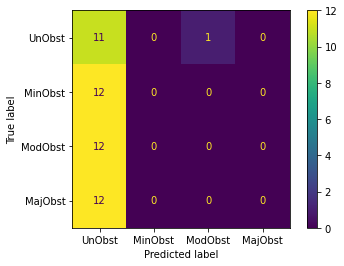

In [ ]:
# Coded by Adam

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score

# Confusion Matrix
# Comparing the truth labels to the predictions made by the model
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3])
print(y_true)
print(y_pred)

# Accuracy Score
accuracy = accuracy_score(y_true, y_pred)
print("The accuracy score of the model is " + str(accuracy))

# Precision Score
precision = precision_score(y_true, y_pred, average=None)
print("The precision score for predicting Unobstructed cloud images is " + str(precision[0]))
print("The precision score for predicting Minor Obstructed cloud images is " + str(precision[1]))
print("The precision score for predicting Moderate Obstructed cloud images is " + str(precision[2]))
print("The precision score for predicting Major Obstructed cloud images is " + str(precision[3]))

# Displaying the Confusion Matrix
# Used defined labels from labels.txt in the converted_keras folder in the drive
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['UnObst', 'MinObst', 'ModObst', 'MajObst'])
disp.plot()
plt.show()

## Greyscale Results

According to the confusion matrix, the geryscale model performed poorly. These results are suprising because research suggested that it would perform better than its RGD counterpart.

One source for the inadequate results may stem from Google's Teachable machine being trained in RGB form instead of B/W. When forming arrays with the image data, greyscaled images only require two dimensions, yet RGB images require three dimensions when sending the data to teachable machine. However, despite whether the data is two or three dimensions, Google's teachable machine may intepret all input data in three dimensions despite what dimension the color input is.

For future research steps, it is imperative that a teachable machine that supports greyscaling is used for assessing greyscaled images.
(written by Henry)

## Conclusion

Throughout this deliverable, we successfully created a dataset, trained and tested a model, and made some visualizations to represent the accuracy and precision of our model. We did this by manually selecting images and separating them into four categories based on how obstructed each image was (from no obstructions to an image being more the 50% obstructed). Our four image folders were then split 80/20 into a training and testing dataset. After splitting our data, we trained a Teachable Machine model before importing it and testing it with our test set data. We then made a confusion matrix and a visualization to compare images in one of our categories to highlight the performance of our model. Overall, our model performed decently with an accuracy score of 83%.

It is important to note that the model cannot necessarily be trusted to identify minor obstructed images. Since there are several cases where the images labeled as unobstructed had minor obstructions in them, the model is blurring the two categories together and is not a wholly accurate predictor for each category.

Based on our findings, the model was very good at identifying varying levels of obstructions within cloud images, which is exactly what we wanted. It should be noted that while the model was incorrect in identifying some minor obstructed images as unobstructed, this is not necessarily a bad thing for our project. Our ultimate goal was to make a model that can distinguish between small obstructions and large obstructions. Because a minor obstructed image is still perfectly usable in the process of cloud identification, having minor obstructed images confused with unobstructed images is ultimately not a problem. The same thing can be said for any moderate or major images that were confused with each other. Since moderate and major obstructed images are generally not wanted, having those categories mix a bit is not a real problem.

After successfully creating and analyzing a model for obstructions in regular cloud images, our team attempted to create a greyscale model. This model unfortunantly performed poorly and had inconclusive results. Since Google's teachable machine supports RGB three-dimension images and not BW two-dimension images, the source of the models innaccuracy may stem from this discrepency. In the future, it will be neccessary to find a teachable machine that supports greyscale.

Future Directions: The focus of our project was to have a model flag obstructed images, so the next natural step would be to have a model remove unwanted images from the data set entirely. While we also wanted to grayscale our images and train/test a new model, we did not have the time to successfully complete this step. A good future expansion of this project for FIRE students would be to do the grayscaling with a BW-supported teachable machine and see if prediction results are better.

(Henry & Valerie)



##Relevant Literature

Bui, H. M., Lech, M., Cheng, E., Neville, K., & Burnett, I. S. (2016, July). Using grayscale images for object recognition with convolutional-recursive neural network. In 2016 IEEE Sixth International Conference on Communications and Electronics (ICCE) (pp. 321-325). IEEE. https://ieeexplore.ieee.org/abstract/document/7562656

Robles, M. C., Amos, H. M., Dodson, J. B., Bouwman, J., Rogerson, T., Bombosch, A., Farmer, L., Burdick, A., Taylor, J., & Chambers, L. H. (2020, August 4). Clouds around the world: How A simple citizen science data challenge became a worldwide success. AMETSOC. Retrieved November 8, 2022, from https://journals.ametsoc.org/view/journals/bams/101/7/bamsD190295.xml?tab_body=fulltext-display
